In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

C:\Users\USER\AppData\Local\Temp\ipykernel_3024\4273481083.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
salary= pd.read_csv("salaries.csv")
salary

,company,job,degree,salary
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


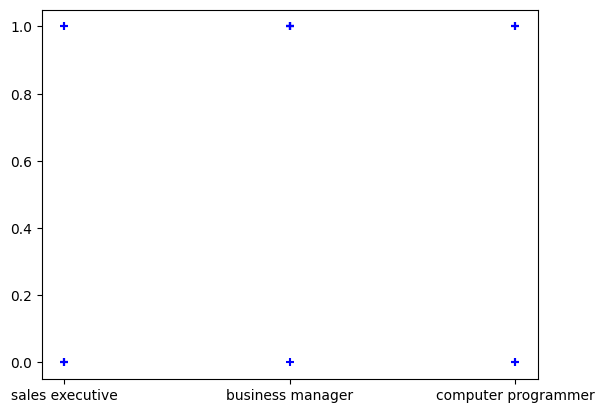

In [5]:
plt.scatter(salary["job"],salary["salary"], marker ='+',color = 'blue')


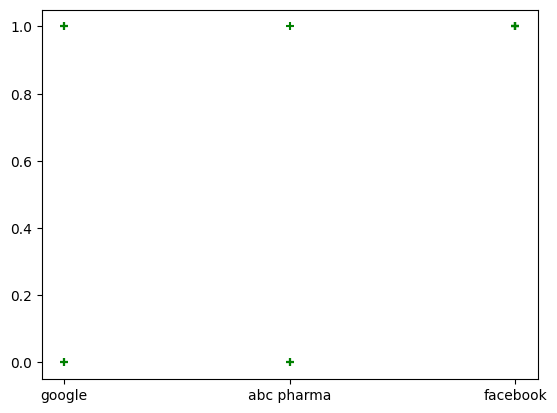

In [6]:
plt.scatter(salary["company"],salary["salary"], marker ='+',color = 'green')


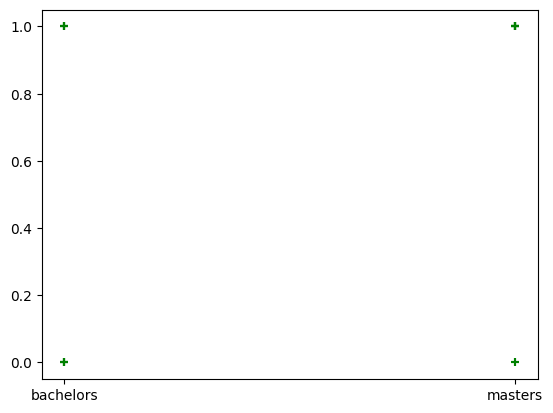

In [7]:
plt.scatter(salary['degree'],salary['salary'], marker ='+',color = 'green')

In [9]:
revised_salary=salary.drop(columns=['salary'])
revised_salary=pd.get_dummies(revised_salary,dtype=int)
revised_salary

,company_abc pharma,company_facebook,company_google,job_business manager,job_computer programmer,job_sales executive,degree_bachelors,degree_masters
0,0,0,1,0,0,1,1,0
1,0,0,1,0,0,1,0,1
2,0,0,1,1,0,0,1,0
3,0,0,1,1,0,0,0,1
4,0,0,1,0,1,0,1,0
5,0,0,1,0,1,0,0,1
6,1,0,0,0,0,1,0,1
7,1,0,0,0,1,0,1,0
8,1,0,0,1,0,0,1,0
9,1,0,0,1,0,0,0,1


In [10]:
output_salary=salary['salary']
output_salary

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary, dtype: int64

In [13]:
revised_salary_train,revised_salary_test,output_salary_train,output_salary_test=train_test_split(revised_salary,output_salary,test_size=0.2)
model=LogisticRegression()
model.fit(revised_salary_train,output_salary_train)
prediction=model.predict(revised_salary_test)
prediction

array([1, 1, 1, 1], dtype=int64)

In [12]:
print("The Accuracy is  ",int((model.score(revised_salary_train,output_salary_train))*100),'%')

The Accuracy is   83 %
